In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import datetime

In [4]:
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('trainData.csv')
test = pd.read_csv('testData.csv')

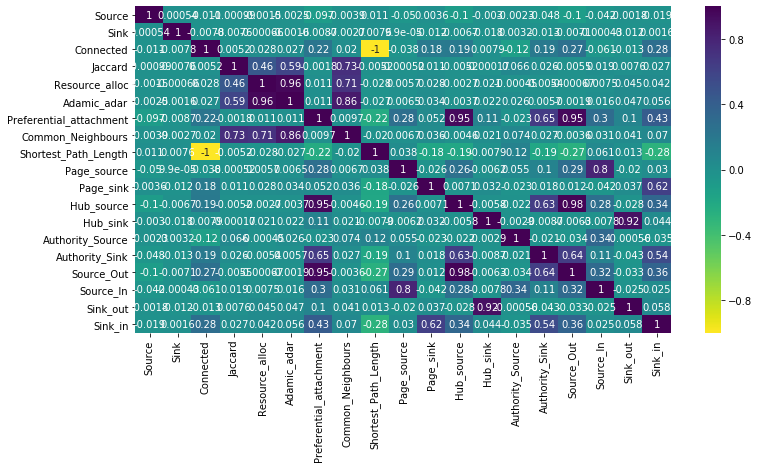

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='viridis_r', annot=True)

In [81]:
def generate_submission(predictions):
    id_list = [x for x in range(1,2001)]
    pred_list = [x for x in predictions]
    pred = pd.DataFrame(list(zip(id_list, pred_list)), columns=['Id','Predictions'])
    pred.to_csv(f'./submissions/submit_{datetime.datetime.now()}.csv', index=False)

In [13]:
X = df[['Resource_alloc', 'Page_sink', 'Hub_source', 'Authority_Sink', 'Sink_in']]
y = df['Connected']

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
from sklearn.svm import SVC

In [27]:
parameters = {'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'C':[0.001, 0.01, 0.1, 1, 10]}
svc = SVC(gamma='auto')
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
validate = clf.predict(X_test)

In [42]:
svc2 = SVC(C=10, kernel='linear', probability=True, gamma = 'auto')

In [43]:
svc2

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
svc2.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
validate = svc2.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, validate))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68     17173
           1       0.99      0.09      0.16     17367

    accuracy                           0.54     34540
   macro avg       0.76      0.54      0.42     34540
weighted avg       0.76      0.54      0.42     34540



In [34]:
test.head()

,Source,Sink,Jaccard,Resource_alloc,Adamic_adar,Preferential_attachment,Common_Neighbours,Shortest_Path_Length,Page_source,Page_sink,Hub_source,Hub_sink,Authority_Source,Authority_Sink,Source_Out,Source_In,Sink_out,Sink_in
0,2184483,1300190,0.0,0.0,0.0,18,0,2,0.000029,0.000055,2.858200e-55,0.000000e+00,0.0,1.163235e-06,0.000201,0.0,0.000000,0.000100
1,3151356,1452193,0.0,0.0,0.0,36,0,2,0.000029,0.000031,2.007915e-10,0.000000e+00,0.0,1.342467e-03,0.000201,0.0,0.000000,0.000201
2,1579396,193159,0.0,0.0,0.0,12,0,2,0.000029,0.000037,3.722702e-49,0.000000e+00,0.0,2.499446e-06,0.000201,0.0,0.000000,0.000067
3,1406432,2481036,0.0,0.0,0.0,42,0,2,0.000029,0.000037,2.858200e-55,1.873883e-10,0.0,1.067062e-11,0.000201,0.0,0.000201,0.000067
4,2389638,593017,0.0,0.0,0.0,48,0,2,0.000029,0.000033,1.106398e-06,1.721999e-07,0.0,9.669078e-53,0.000201,0.0,0.000234,0.000033


In [37]:
X_label = test[['Resource_alloc', 'Page_sink', 'Hub_source', 'Authority_Sink', 'Sink_in']]

In [47]:
predictions = svc2.predict_proba(X_label)

(array([1.907e+03, 4.600e+01, 8.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 4.000e+00, 2.500e+01]),
 array([0.45081593, 0.50573434, 0.56065275, 0.61557115, 0.67048956,
        0.72540797, 0.78032637, 0.83524478, 0.89016319, 0.94508159,
        1.        ]),
 <a list of 10 Patch objects>)

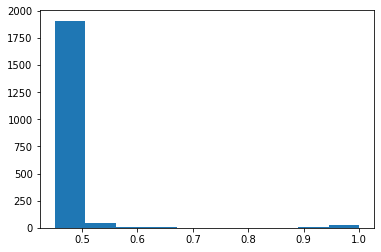

In [50]:
plt.hist(predictions[:,1])

In [52]:
generate_submission(predictions)

In [53]:
from xgboost import XGBClassifier, XGBRegressor

In [54]:
XGBClassifier?

In [55]:
parameters = {'booster':['gbtree', 'gblinear', 'dart'], 'learning_rate':[0.001, 0.01, 0.1, 1, 10], 'importance_type':["gain",
    "weight", "cover", "total_gain", "total_cover"], 'n_estimators':[3,5,10,25,100]}
model = XGBClassifier()
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1),
             iid='warn', n_jobs=None,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'importance_type': ['gain', 'weight', 'cover',
                                             'total_gain', '

In [56]:
validate = clf.predict(X_test)

In [57]:
print(classification_report(y_test, validate))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80     17173
           1       0.86      0.66      0.75     17367

    accuracy                           0.77     34540
   macro avg       0.79      0.77      0.77     34540
weighted avg       0.79      0.77      0.77     34540



In [58]:
predictions = clf.predict_proba(X_label)

(array([1630.,   25.,   16.,   16.,   20.,   38.,   21.,   21.,   34.,
         179.]),
 array([1.0032453e-20, 9.9990830e-02, 1.9998166e-01, 2.9997250e-01,
        3.9996332e-01, 4.9995416e-01, 5.9994501e-01, 6.9993585e-01,
        7.9992664e-01, 8.9991748e-01, 9.9990833e-01], dtype=float32),
 <a list of 10 Patch objects>)

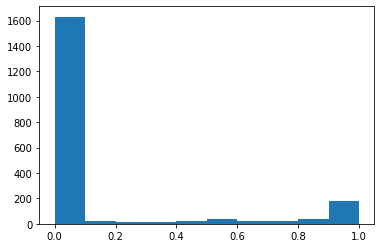

In [59]:
plt.hist(predictions[:,1])

In [60]:
generate_submission(predictions)

In [5]:
df = pd.read_csv('cmon4.csv')

In [6]:
df.head()

,Id,Predictions
0,1,0.344023
1,2,0.716329
2,3,0.344023
3,4,0.815775
4,5,0.375173


(array([821.,  74.,  16.,   7.,   0.,   1.,   3., 338., 389., 351.]),
 array([0.29449604, 0.3481895 , 0.40188295, 0.4555764 , 0.50926986,
        0.56296331, 0.61665677, 0.67035022, 0.72404367, 0.77773713,
        0.83143058]),
 <a list of 10 Patch objects>)

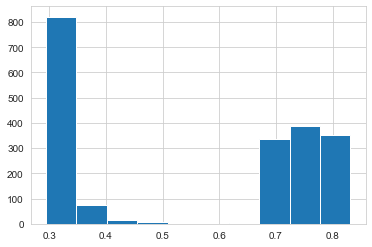

In [7]:
plt.hist(df['Predictions'])

(array([821.,  74.,  16.,   7.,   0.,   1.,   3., 338., 389., 351.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

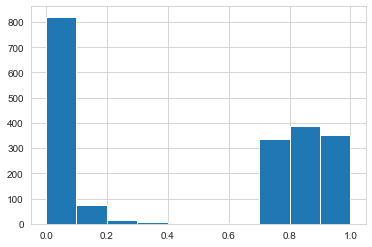

In [8]:
plt.hist(df['Predictions'].apply(lambda x:(x-min(df['Predictions']))/0.5369345350000001))

In [9]:
max(df['Predictions']) - min(df['Predictions'])

0.5369345350000001

In [14]:
predictions = df['Predictions'].apply(lambda x:(x-min(df['Predictions']))/0.5369345350000001)

In [18]:
generate_submission(predictions)

In [10]:
test = pd.read_csv('test_2kchangedfeats_spc.csv')

In [12]:
test['Labels'] = df['Predictions'].apply(lambda x:(x-min(df['Predictions']))/0.5369345350000001)

In [91]:
test.head()

,Source,Sink,Resource_alloc,SourceInDegree,SourceOutDegree,SinkInDegree,SinkOutDegree,Common_Neighbours,Jaccard,ResourceAlloc,AdamicAdar,PrefAttach,Shortest_Path_Length,N2V_dotprod,Source_Out_on_Sink_In,Labels
0,2184483,1300190,0.000000,102,83,3,0,0,0.000000,0.000000,0.000000,435,3,0.131168,27.666667,0.092240
1,3151356,1452193,0.000740,39,340,289,0,4,0.006260,0.000740,0.407705,102306,2,-0.188574,1.176471,0.785632
2,1579396,193159,0.000000,13,208,2,0,0,0.000000,0.000000,0.000000,418,3,-0.021402,104.000000,0.092240
3,1406432,2481036,0.032617,16,84,24,14,7,0.062500,0.032617,1.238898,2838,2,0.011010,3.500000,0.970843
4,2389638,593017,0.006229,30,267,165,58,6,0.012072,0.006229,0.802812,62196,3,-0.044647,1.618182,0.150255


In [18]:
X = test.drop(['Source', 'Sink', 'SourceInDegree', 'SourceOutDegree', 'SinkInDegree', 'SinkOutDegree', 'N2V_dotprod', 'Labels'], axis=1)

In [115]:
y = test['Labels']

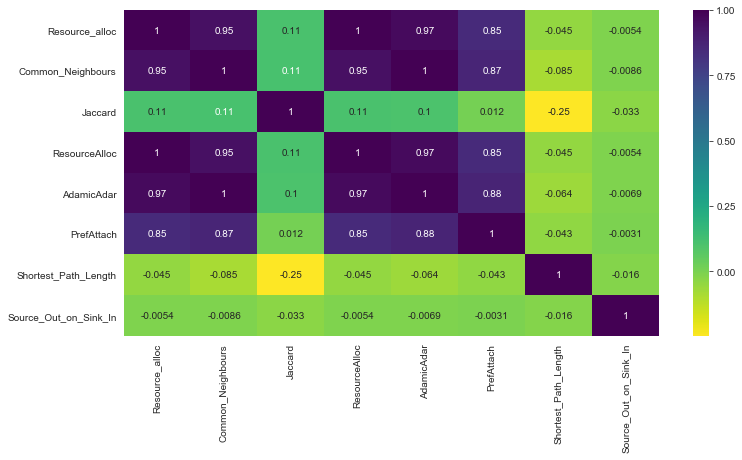

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(), cmap='viridis_r', annot=True)

In [24]:
# Common Neighbors
# Adamic Adar
# PA
# RA
# all correlated

In [25]:
X.columns

Index(['Resource_alloc', 'Common_Neighbours', 'Jaccard', 'ResourceAlloc',
       'AdamicAdar', 'PrefAttach', 'Shortest_Path_Length',
       'Source_Out_on_Sink_In'],
      dtype='object')

In [27]:
X1 = X.drop(['Resource_alloc', 'Common_Neighbours', 'ResourceAlloc', 'AdamicAdar'], axis = 1)
X2 = X.drop(['Resource_alloc', 'PrefAttach', 'ResourceAlloc', 'AdamicAdar'], axis = 1)
X3 = X.drop(['Resource_alloc', 'Common_Neighbours', 'ResourceAlloc', 'PrefAttach'], axis = 1)
X4 = X.drop(['PrefAttach', 'Common_Neighbours', 'ResourceAlloc', 'AdamicAdar'], axis = 1)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()
lr4 = LinearRegression()

In [31]:
lr1.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lr2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lr3.fit(X3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lr4.fit(X4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
pred1 = lr1.predict(X1)
pred2 = lr1.predict(X2)
pred3 = lr1.predict(X3)
pred4 = lr1.predict(X4)

In [46]:
pred_df = pd.DataFrame(list(zip(pred1,pred2,pred3,pred4)))

In [77]:
def avg(row):
    val = 0
    for i in range(4):
        if 0 <= row[i] <= 1:
            val += row[i]
        else:
            val += min(row)
    return abs(val/4) if abs(val/4) <= 1 else 1

1.9900969876394008

In [78]:
predictions = pred_df.apply(avg, axis=1)

(array([153.,   2., 644.,  94.,   7.,   2.,  17., 918., 108.,  55.]),
 array([0.01405311, 0.1126478 , 0.21124249, 0.30983718, 0.40843187,
        0.50702656, 0.60562125, 0.70421593, 0.80281062, 0.90140531,
        1.        ]),
 <a list of 10 Patch objects>)

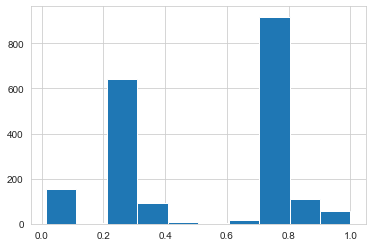

In [79]:
plt.hist(predictions)

In [82]:
generate_submission(predictions)

In [83]:
predictions[:7]

0    0.308266
1    0.714401
2    0.308075
3    0.803869
4    0.326927
5    0.751139
6    0.709341
dtype: float64

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

In [62]:
scaler = MinMaxScaler()

In [63]:
print(scaler.fit(data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [64]:
print(scaler.transform(data))

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [71]:
scaler.fit(pred_df.head(1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [72]:
scaler.transform(pred_df.head(1))

array([[0., 0., 0., 0.]])

In [101]:
final_pred = df['Predictions'].apply(lambda x:(x-min(df['Predictions']))/0.5369345350000001)

In [102]:
mylist = list(zip(final_pred, predictions))

In [103]:
mypred = []
count = 0 
for x,y in mylist:
    if x < 0.5:
        mypred.append(y)
        count += 1
    else:
        mypred.append(x)
        
print(count)

918


In [105]:
mypred = []
for x,y in mylist:
    mypred.append(0.7*x + 0.3*y)

(array([228., 650.,  35.,   2.,   5.,   2.,   8., 519., 376., 175.]),
 array([0.04577346, 0.14119612, 0.23661877, 0.33204142, 0.42746408,
        0.52288673, 0.61830939, 0.71373204, 0.80915469, 0.90457735,
        1.        ]),
 <a list of 10 Patch objects>)

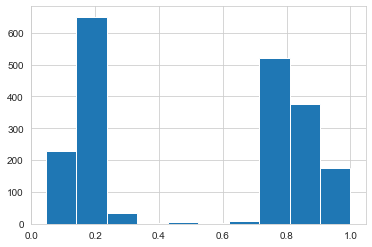

In [106]:
plt.hist(mypred)

In [107]:
generate_submission(mypred)

In [108]:
from sklearn.svm import SVC

In [135]:
svc1 = SVC(gamma='auto', probability=True)
svc2 = SVC(gamma='auto', probability=True)
svc3 = SVC(gamma='auto', probability=True)
svc4 = SVC(gamma='auto', probability=True)

In [124]:
label = [relabel(x) for x in y]

In [123]:
relabel = lambda x:1 if x > 0.5 else 0

In [125]:
label[:9]

[0, 1, 0, 1, 0, 1, 1, 1, 0]

In [136]:
svc1.fit(X1,label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [137]:
svc2.fit(X2,label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [138]:
svc3.fit(X3,label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [139]:
svc4.fit(X4,label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [140]:
pred1 = svc1.predict_proba(X1)
pred2 = svc2.predict_proba(X2)
pred3 = svc3.predict_proba(X3)
pred4 = svc4.predict_proba(X4)

In [149]:
pred1[:,1]

array([0.1194252 , 0.88920758, 0.11942522, ..., 0.1194252 , 0.1194252 ,
       0.1194252 ])

In [150]:
pred_df = pd.DataFrame(list(zip(pred1[:,1],pred2[:,1],pred3[:,1],pred4[:,1])))

In [152]:
pred_df.describe()

,0,1,2,3
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.533605,0.535622,0.535916,0.540574
std,0.384204,0.488344,0.482342,0.480584
min,0.070826,0.000011,0.000085,0.000227
25%,0.119425,0.002242,0.010859,0.019912
50%,0.889089,0.986277,0.982714,0.985794
75%,0.889119,0.986330,0.985672,0.990804
max,0.889232,0.999994,0.994763,0.997279


In [153]:
def avg(row):
    val = 0
    for i in range(4):
        val += row[i]
    return abs(val/4)

In [154]:
predictions = pred_df.apply(avg, axis=1)

(array([9.010e+02, 1.200e+01, 5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 8.000e+00, 1.200e+01, 1.057e+03]),
 array([0.02081382, 0.1154248 , 0.21003578, 0.30464676, 0.39925774,
        0.49386872, 0.5884797 , 0.68309068, 0.77770166, 0.87231264,
        0.96692362]),
 <a list of 10 Patch objects>)

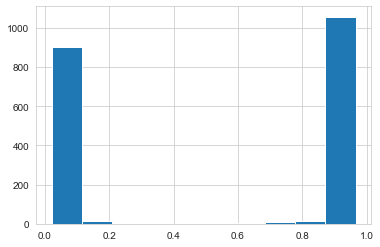

In [155]:
plt.hist(predictions)

In [156]:
mylist = list(zip(final_pred, predictions))

In [186]:
mypred = []
for x,y in mylist:
    mypred.append(0.35*x + 0.6*y + 0.05*random.random() )

(array([885.,  30.,   3.,   1.,   0.,   1.,   2.,  10., 327., 741.]),
 array([0.03296249, 0.12733885, 0.2217152 , 0.31609155, 0.41046791,
        0.50484426, 0.59922062, 0.69359697, 0.78797332, 0.88234968,
        0.97672603]),
 <a list of 10 Patch objects>)

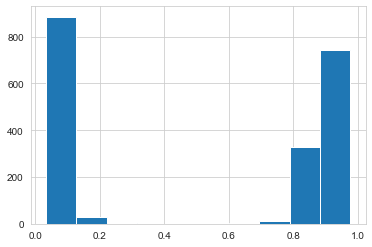

In [187]:
plt.hist(mypred)

In [188]:
generate_submission(mypred)

(array([821.,  74.,  16.,   7.,   0.,   1.,   3., 338., 389., 351.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

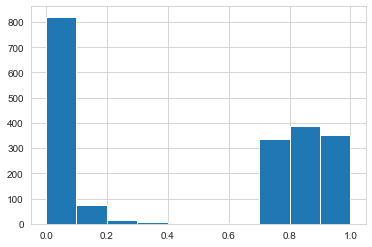

In [166]:
plt.hist(final_pred)